In [1193]:
print("Hello world")

Hello world


# Refer the below documentation before starting

### https://jovian.ai/aakashns/python-sklearn-linear-regression

* Problem statement
* download the dataset
* Linear regression with one variable using Scikit-learn
* Linear regression with multiple variables
* Using categorical features
* regression coefficients and feature importance
* othr models and techniques for regression using scikit-learn
* applying linear regression to other dataset


QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

Notes :
An insurance company wants to predict the charges of the customer it give the datas with age,sex,BMI,children,smoking,region of residence,charges

> Add blockquote



In [1200]:
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv"


In [1201]:
from urllib.request import urlretrieve
urlretrieve(url,"insurance.csv")

('insurance.csv', <http.client.HTTPMessage at 0x277470210a0>)

In [1202]:
!pip install pandas --quiet 

In [1203]:
import pandas as pd
df=pd.read_csv("insurance.csv")

In [1204]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [1205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [1206]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [1207]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Jovian - to store the file
### command : jovian.commit(project="file-name')

In [1209]:
# !pip install jovian --quiet

In [1210]:
import jovian
jovian.commit

<function jovian.utils.commit.commit(message=None, files=[], outputs=[], environment=None, privacy='auto', filename=None, project=None, new_project=None, git_commit=False, git_message='auto', require_write_access=False, **kwargs)>

# Exploratory Analysis and visualization

In [1212]:
# !pip install plotly matplotlib seaborn --quiet

In [1213]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1214]:
sns.set_style('darkgrid') ## other white,dark,whitegrid,ticks
matplotlib.rcParams['font.size']=14  
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']="#00000000"

In [1215]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### From the describtion we see that the age is min of 18 and the max of 64 so there are approx 47 bins of data so here we can use histogram

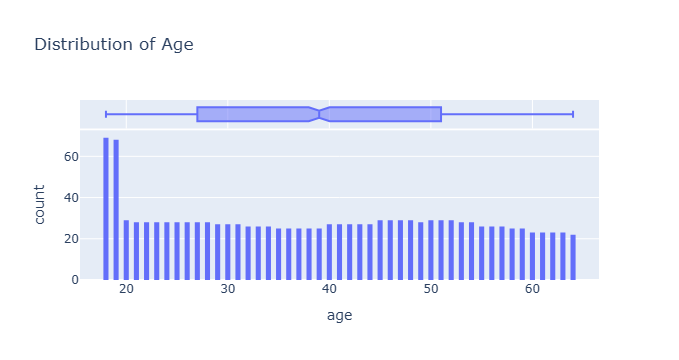

In [1217]:
fig=px.histogram(df,
                 x='age',
                 marginal='box',
                 nbins=47, # 64 -47 +1
                 title="Distribution of Age")
fig.update_layout(bargap=0.5)
fig.show()

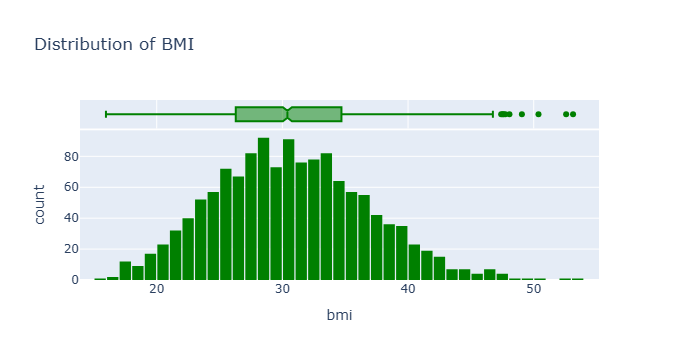

In [1218]:
fig=px.histogram(df,
                 x='bmi',
                 marginal='box', ## box plot
                 color_discrete_sequence=['green'],
                 title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.show()
                 

### Observation
From this the bmi is in normal or guassian distribution the person is 
* weak -> if bmi <18.5
* normal -> 18.5 - 24.9
* overweight -> 25 -29.9
* obesity -> 30 -39.9
* morbid obesity -> >40

In [1220]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Distribution of charges

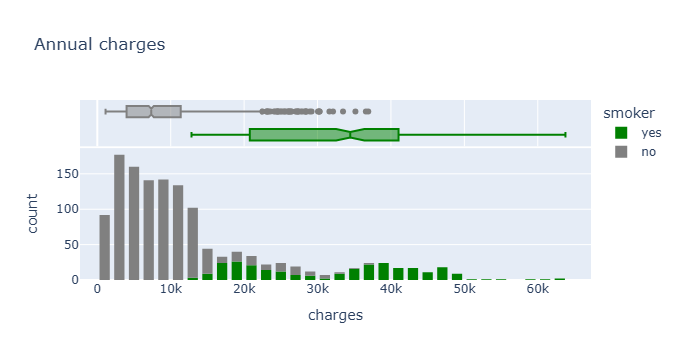

In [1222]:
fig=px.histogram(df,
                 x="charges",
                 marginal="box",
                 color="smoker",
                 color_discrete_sequence=['green','grey'],
                 title="Annual charges"
                )
fig.update_layout(bargap=0.3)
fig.show()

### Task is to find the analysis of charges with the sex and region


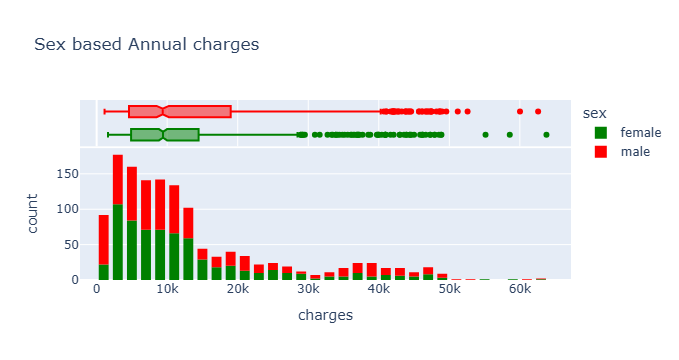

In [1224]:
fig=px.histogram(df,
                 x="charges",
                 marginal="box",
                 color="sex",
                 color_discrete_sequence=['green','red',"blue","black"],
                 title="Sex based Annual charges "
                )
fig.update_layout(bargap=0.3)
fig.show()

In [1225]:
# The observation is charges for male and female


In [1226]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

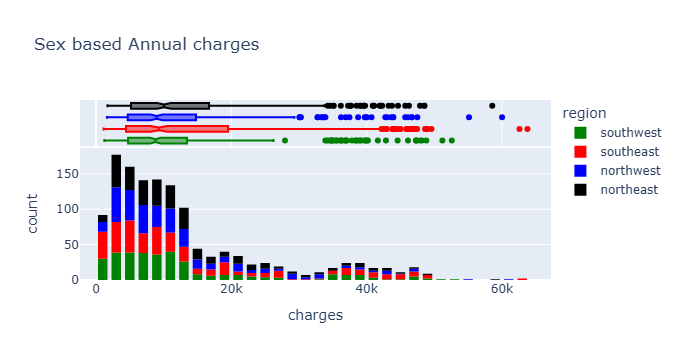

In [1227]:
fig=px.histogram(df,
                 x="charges",
                 marginal="box",
                 color="region",
                 color_discrete_sequence=['green','red',"blue","black"],
                 title="Sex based Annual charges "
                )
fig.update_layout(bargap=0.3)
fig.show()

In [1228]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

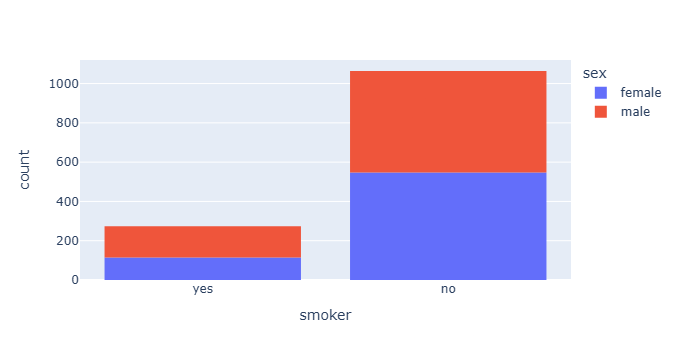

In [1229]:
px.histogram(df,x="smoker",color="sex",hover_data=df)

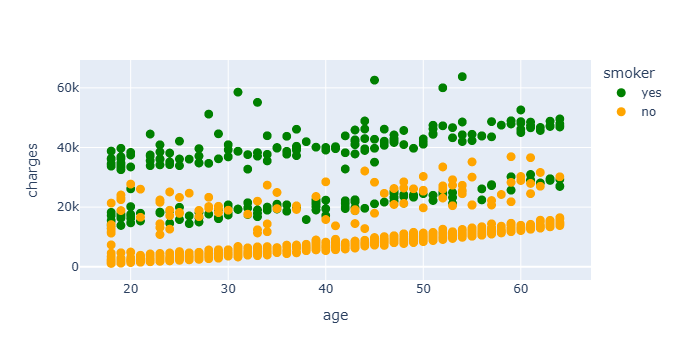

In [1230]:
fig=px.scatter(df,
           x="age",
           y="charges",
           color="smoker",
           hover_data="sex",
           color_discrete_sequence=["green","orange"]
          )
fig.update_traces(marker_size=9)

 #### Observation the chart show the distribution of smoker vs non smoker based on their age and there are some outliers so the age has the better relation with the charges

## BMI Vs charges

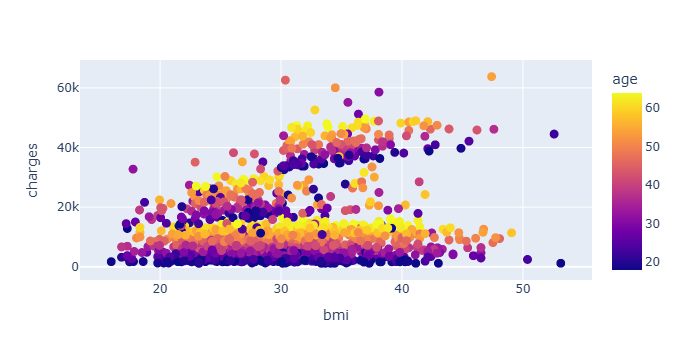

In [1233]:
fig=px.scatter(df,
           x="bmi",
           y="charges",
           color="age",
           hover_data="sex",
           color_discrete_sequence=["green","orange"]
          )
fig.update_traces(marker_size=9)

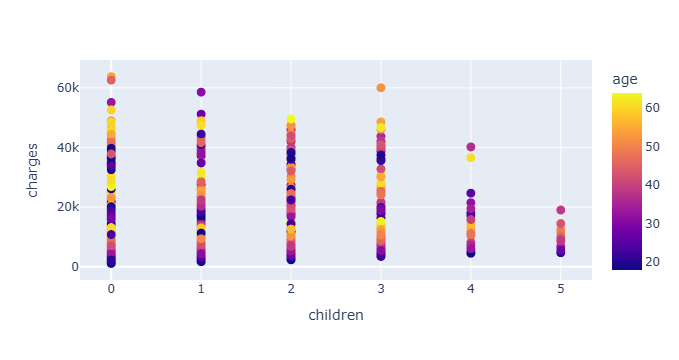

In [1234]:
fig=px.scatter(df,
           x="children",
           y="charges",
           color="age",
           hover_data="sex",
           color_discrete_sequence=["green","orange"]
          )
fig.update_traces(marker_size=9)

### here we cant find the clear visual in the scatter for that we can use the violin chart

In [1236]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## violin chart

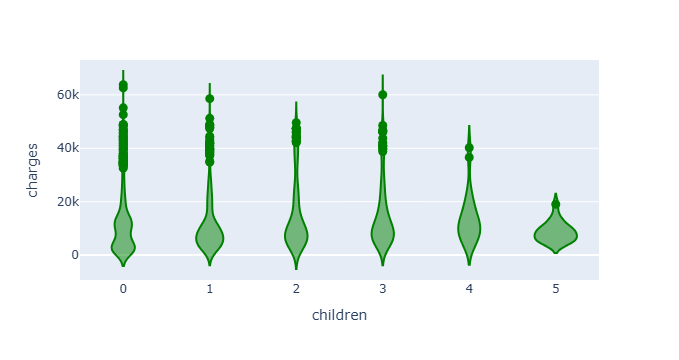

In [1238]:
fig=px.violin(df,
           x="children",
           y="charges",
           # color="bmi",
           hover_data="sex",
           color_discrete_sequence=["green","orange"]
          )
fig.update_traces(marker_size=9)

# From the observation of all the chart then we find the columns 

In [1240]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# If the values is close to 1 it is moe correlated -1 means less 
# The higher the absolute correlation value (closer to 1 or -1), the stronger the linear relationship.

In [1242]:
df.charges.corr(df.age) 

0.29900819333064765

In [1243]:
df.charges.corr(df.bmi)

0.19834096883362892

### we cant find the corr for numerical and cataegorical col


In [1245]:
df.charges.corr(df.children)

0.06799822684790487

In [1246]:
# df.charges.corr(df.smoker)

In [1247]:
smoker_dict={'no':0,'yes':1}
smoker_numeric=df.smoker.map(smoker_dict)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

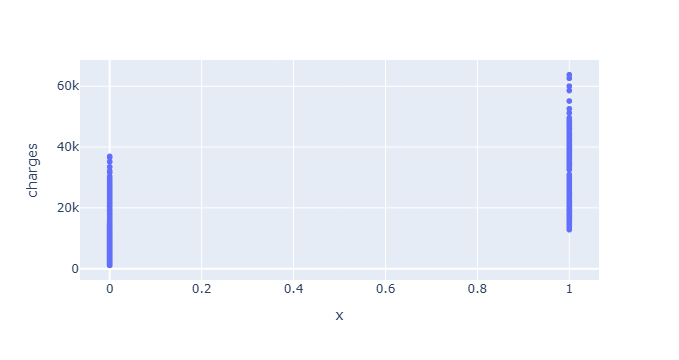

In [1248]:
px.scatter(df,
           x=smoker_numeric,
           y="charges"
          )

In [1249]:
df.charges.corr(smoker_numeric) 

0.7872514304984772

## observation
### the charges and the smoker have the higher correlation than age
here is the correlation diagram  refer the correlation formula

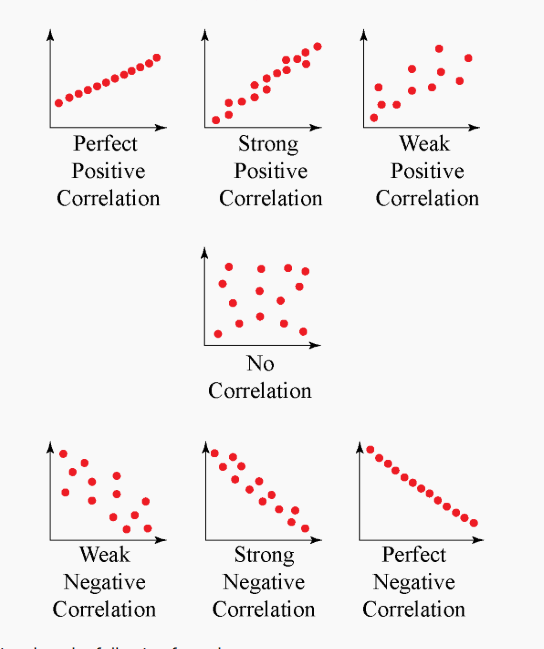

## Find the numerical column for correlelation

In [1253]:
temp_df=df.select_dtypes(include="number").astype(int) 

In [1254]:
temp_df

age  bmi  children  charges
0      19   27         0    16884
1      18   33         1     1725
2      28   33         3     4449
3      33   22         0    21984
4      32   28         0     3866
...   ...  ...       ...      ...
1333   50   30         3    10600
1334   18   31         0     2205
1335   18   36         0     1629
1336   21   25         0     2007
1337   61   29         0    29141

[1338 rows x 4 columns]

In [1255]:
temp_df.corr()

age       bmi  children   charges
age       1.000000  0.108437  0.042469  0.299009
bmi       0.108437  1.000000  0.011097  0.196188
children  0.042469  0.011097  1.000000  0.067999
charges   0.299009  0.196188  0.067999  1.000000

<Axes: >

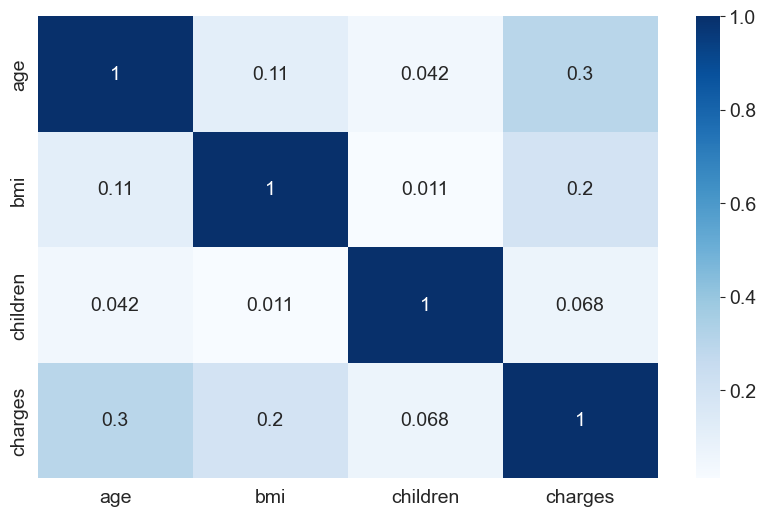

In [1256]:
import seaborn as sns
sns.heatmap(temp_df.corr(),cmap="Blues",annot=True)

# Linear Regression using a single feature

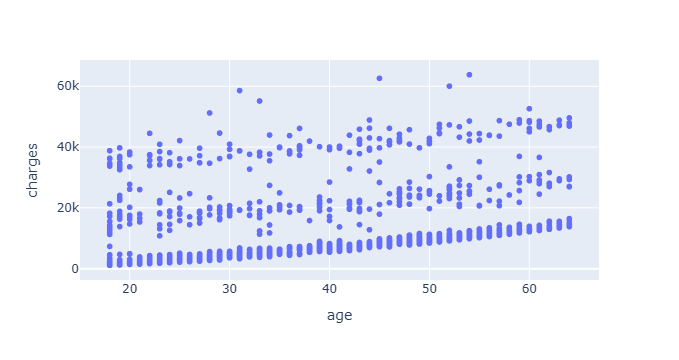

In [1258]:
px.scatter(df,
           x="age",
           y="charges"
          )

## Non smoker data

In [1260]:
non_smoker_df=df[df.smoker=="no"]
non_smoker_df

age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]

<Axes: xlabel='age', ylabel='charges'>

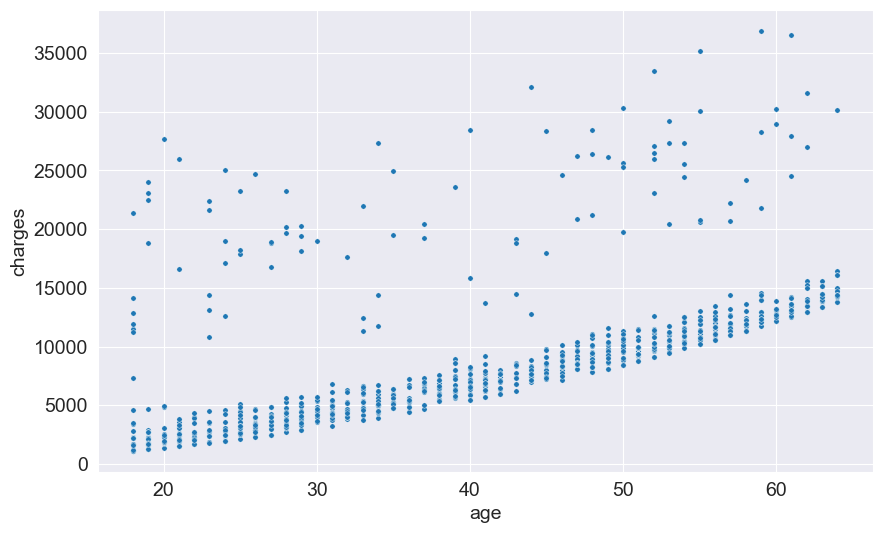

In [1261]:
sns.scatterplot(data=non_smoker_df,
               x="age",
               y="charges",
               s=15,
               # hover_data=df  # it is only available in px
              )

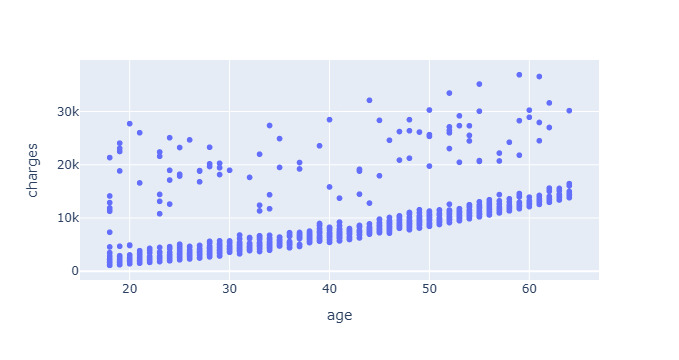

In [1262]:
px.scatter(non_smoker_df,
               x="age",
               y="charges",
               
               hover_data=df  # it is only available in px
              )

# MODEL

### y=wx + b 
### here x is age

In [1265]:
def estimate_charges(age,w,b):
    return w*age+b

In [1266]:
age=40
w=50
b=100
estimate_charges(age,w,b)


2100

### Observation
### the predicted value is not same let plot and see the result becoz for age 40 the value is started in 5400 but it shows 2100

In [1268]:
age=non_smoker_df.age
age

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [1269]:
estimated_charges=estimate_charges(age,w,b)

In [1270]:
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)

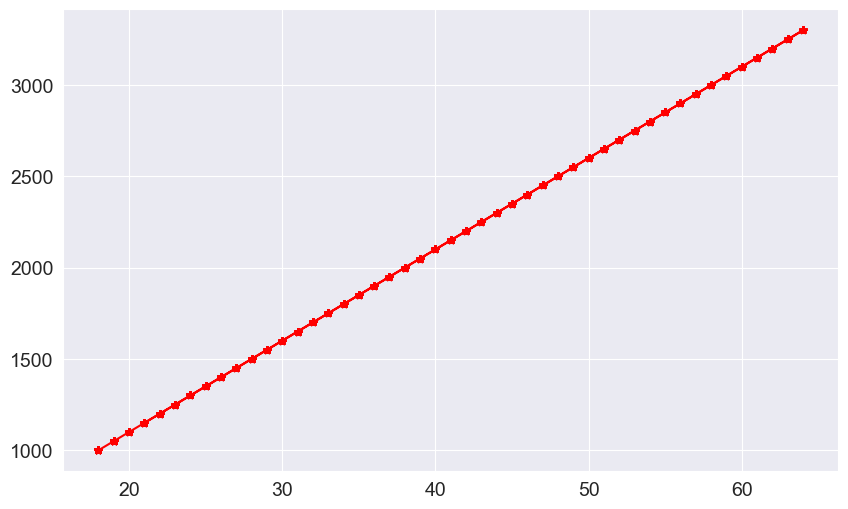

In [1271]:
plt.plot(age,estimated_charges,'r-*')

In [1272]:
non_charges=non_smoker_df.charges

In [1273]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

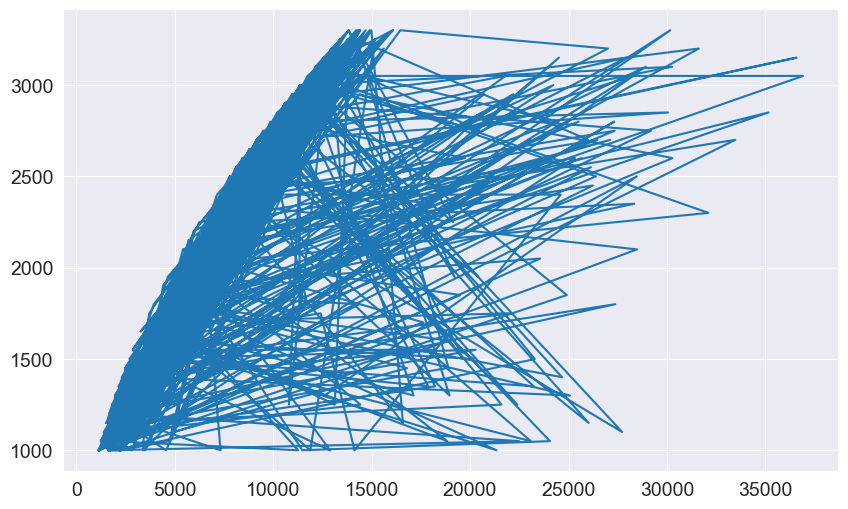

In [1274]:
plt.plot(
            non_charges,
            estimated_charges
           )

## observation 
### the value of the estimate and the original is not matched 

Text(0, 0.5, 'charges')

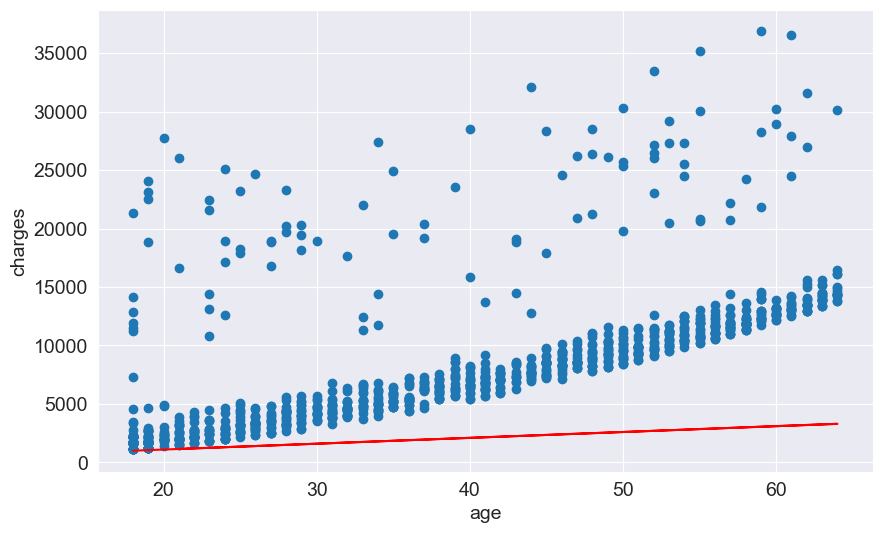

In [1276]:
plt.plot(ages,estimated_charges,'r-')
plt.scatter(ages,non_smoker_df.charges)
plt.xlabel("age")
plt.ylabel("charges")

In [1277]:
non_smoker_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [1278]:
def try_params(w,b):
    ages=non_smoker_df.age
    charges=non_smoker_df.charges
    estimated_charges=estimate_charges(ages,w,b)

    plt.plot(ages,estimated_charges,'r-')
    plt.scatter(ages,charges)
    plt.xlabel("age")
    plt.ylabel("charges")

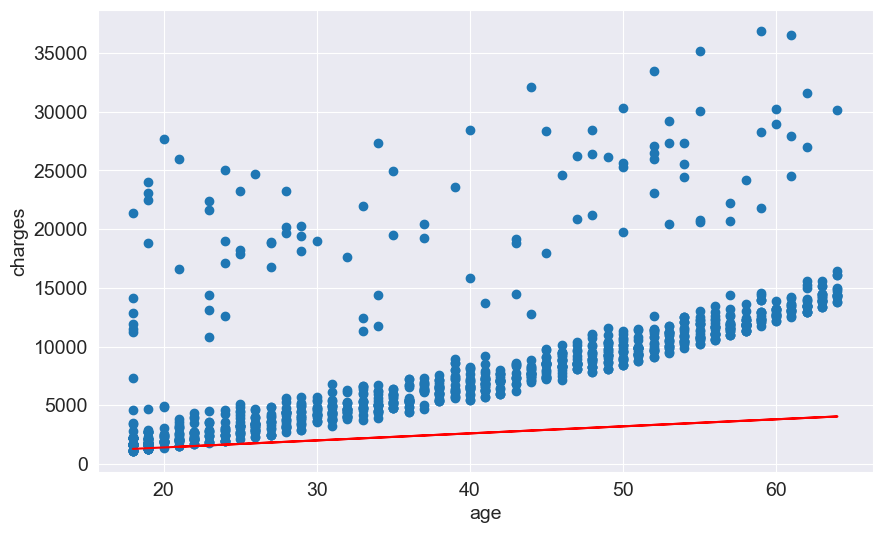

In [1279]:
try_params(60,200)

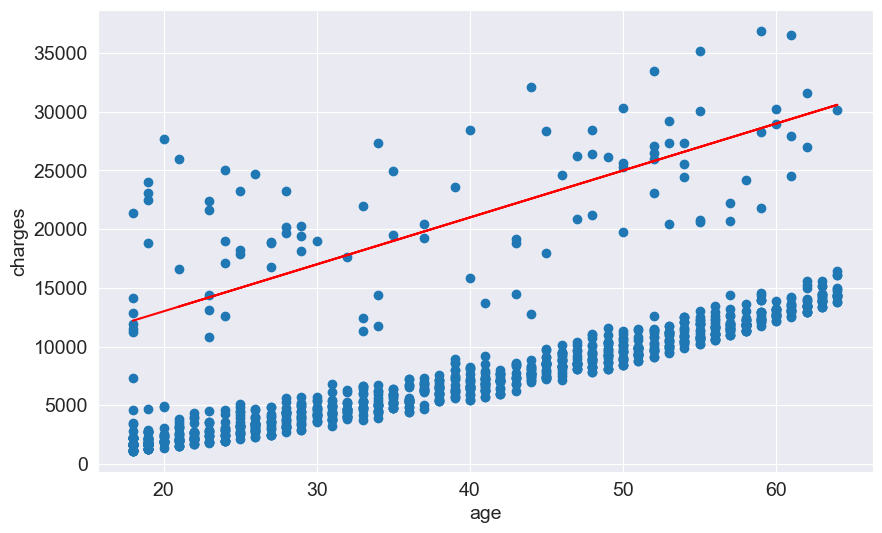

In [1280]:
try_params(400,5000)

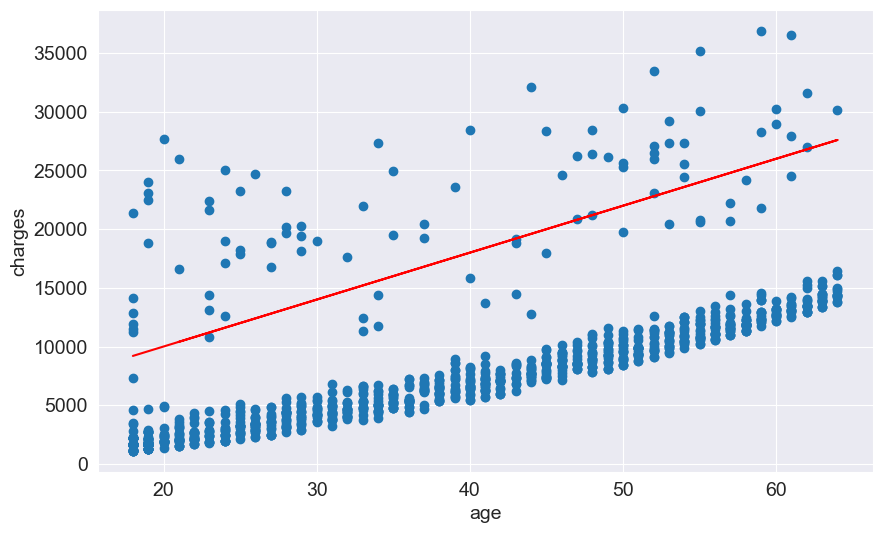

In [1281]:
try_params(400,2000)

## try various value and find the best fit line

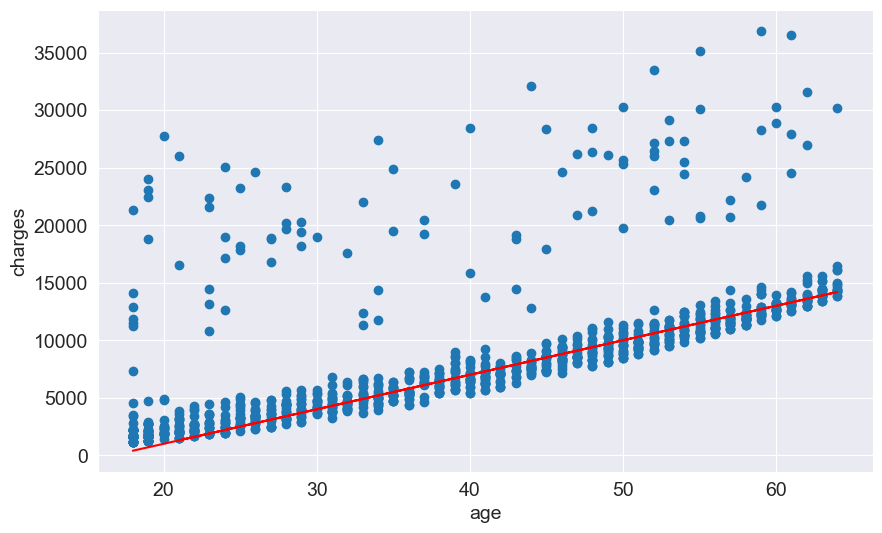

In [1283]:
try_params(300,-5000)

## Obsesrvation
### Here we manually find the best fit line for that we are going to use the linear regression 
### there is a error in the target and the predicted values it can be find by the RMSE(Root Mean square error ) 
## refer the document

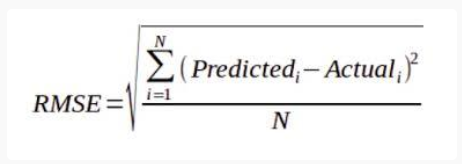

In [1286]:
target=non_smoker_df.charges
predicted=estimate_charges(non_smoker_df.age,w,b)

In [1287]:
import numpy as np

def rmse(target,predictions):
    return np.sqrt(np.mean(np.square(target-predictions)))

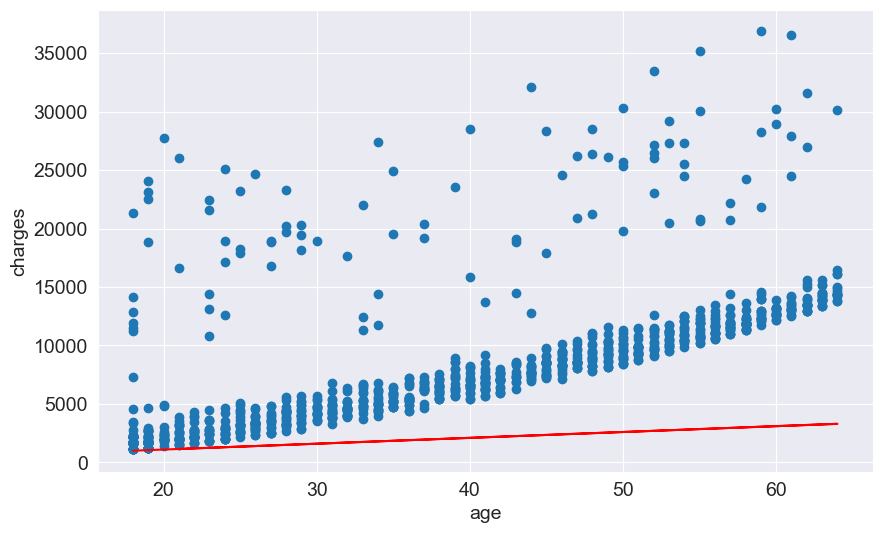

In [1288]:
w=50
b=100
try_params(w,b)

In [1289]:
rmse(target,predicted)

8461.949562575493

In [1290]:
def try_params(w,b):
    ages=non_smoker_df.age
    charges=non_smoker_df.charges
    estimated_charges=estimate_charges(ages,w,b)

    plt.plot(ages,estimated_charges,'r-')
    plt.scatter(ages,charges)
    plt.xlabel("age")
    plt.ylabel("charges")

    loss=rmse(charges,estimated_charges)
    print("RMSE LOSS: ",loss)

## Observation
### try different values for rmse and find the w,b with the lowest rmse

RMSE LOSS:  6564.874895404051


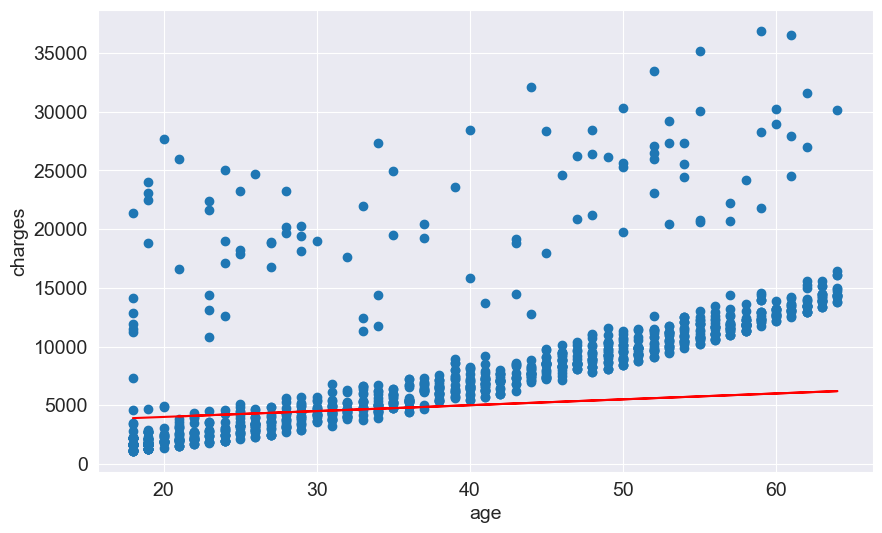

In [1292]:
try_params(50,3000)

In [1293]:
from sklearn.linear_model import LinearRegression

In [1294]:
model=LinearRegression()

In [1295]:
help(model) # it is used to know about the details

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speed

In [1296]:
inputs=non_smoker_df['age']
targets=non_smoker_df.charges
print("input.shape : ",inputs.shape)
print("target.shape : ",targets.shape)

input.shape :  (1064,)
target.shape :  (1064,)


In [1297]:
# model.fit(inputs,targets)

In [1298]:
inputs=non_smoker_df[['age']] ## because our model require only two dimensional no 1-d
targets=non_smoker_df.charges
print("input.shape : ",inputs.shape)
print("target.shape : ",targets.shape)

input.shape :  (1064, 1)
target.shape :  (1064,)


In [1299]:
model.fit(inputs,targets) 

LinearRegression()

In [1300]:
type(model)


sklearn.linear_model._base.LinearRegression

In [1301]:
predictions=model.predict(inputs)

In [1302]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [1303]:
rmse(targets,predictions)

4662.505766636395

In [1304]:
model.coef_

array([267.24891283])

In [1305]:
model.intercept_

-2091.4205565650827

RMSE LOSS:  4662.516524487403


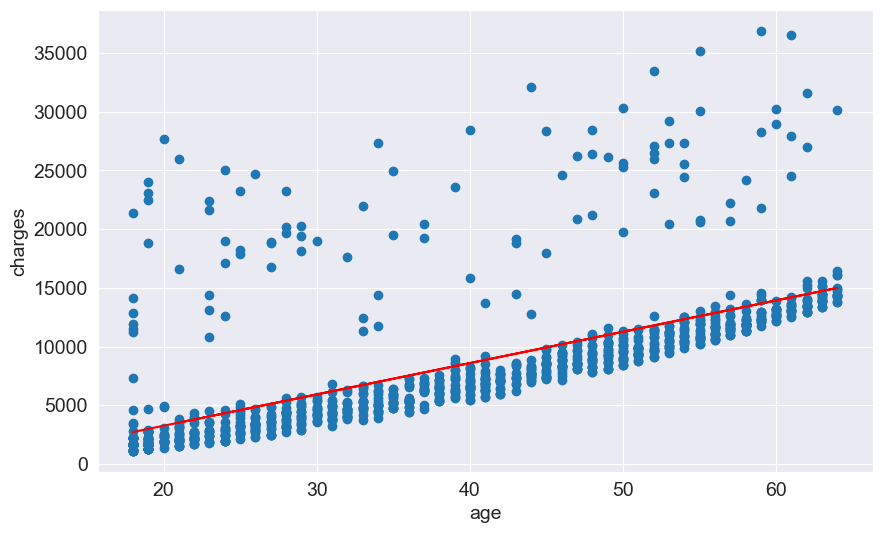

In [1306]:
try_params(267,-2091)

 ## Find the same for the smokers

In [1308]:
smoker_df=df[df.smoker=='yes']

In [1309]:
smoker_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]

In [1310]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
inputs=smoker_df[['age']]
target=smoker_df.charges
model.fit(inputs,target)
print('input : ',inputs.shape)
print('target :',target.shape)

input :  (274, 1)
target : (274,)


In [1311]:
prediction=model.predict(inputs)
rmse(target,prediction)

10711.00334810241

In [1312]:
model.intercept_

20294.128126915966

In [1313]:
model.coef_

array([305.23760211])

RMSE LOSS:  24338.50287260588


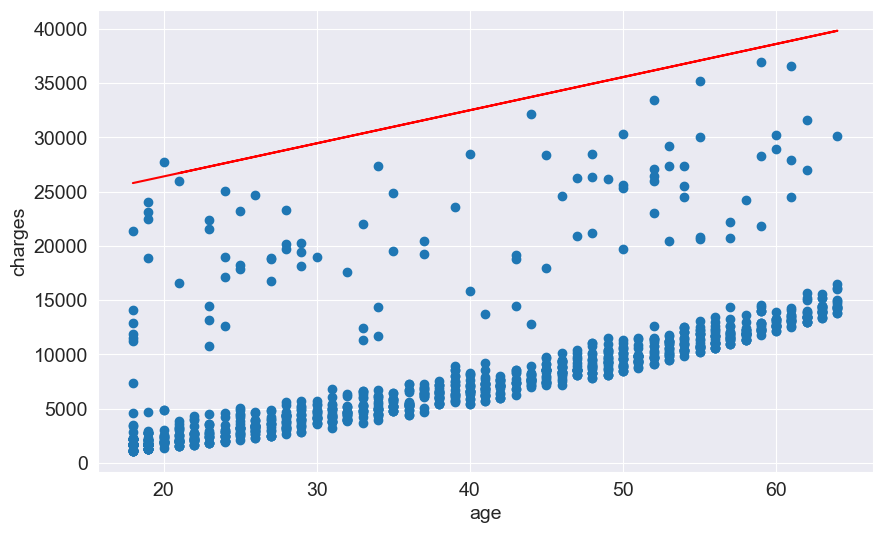

In [1314]:
try_params(305.23760211,20294.128126915966)

# Components of ml

* Model
* Cost Function '
* Optimizer

# Linear Regression Using Multiple Features

## charges=w1 * age + w2 * bmi +b

In [1319]:
input=non_smoker_df[['age']]
target=non_smoker_df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)

loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 4662.505766636395


In [1320]:
input=non_smoker_df[['age','bmi']]
target=non_smoker_df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)

loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 4662.3128354612945


In [1321]:
## the use of bmi in the linear model does not make much changes bcoz it dont have that much relationship with charges
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833272

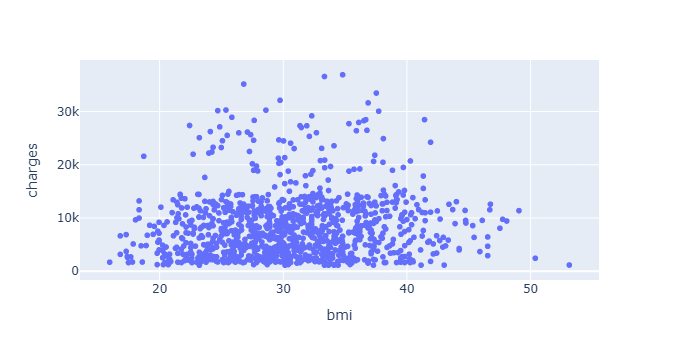

In [1322]:
px.scatter(non_smoker_df,
           x="bmi",
           y="charges"
          ) # there are lots of outlier

In [1323]:
help(px.scatter_3d)

Help on function scatter_3d in module plotly.express._chart_types:

scatter_3d(data_frame=None, x=None, y=None, z=None, color=None, symbol=None, size=None, text=None, hover_name=None, hover_data=None, custom_data=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, error_z=None, error_z_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, size_max=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map=None, opacity=None, log_x=False, log_y=False, log_z=False, range_x=None, range_y=None, range_z=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a 3D scatter plot, each row of `data_frame` is represented by a
        symbol mark in 3D space.

    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed f

In [1324]:
px.scatter_3d(non_smoker_df,
              x="age",
              y="bmi",
              z="charges",
              size="age"
             )


In [1325]:
model.coef_,model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

In [1326]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

In [1327]:
input=non_smoker_df[['age','bmi',"children"]]
target=non_smoker_df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)

loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 4608.470405038246


# Observation
### The loss is reduced less by adding the children feature

# lets see this for the whole dataframe rather than just for the nonsmoker

In [1330]:
input=df[['age','bmi',"children"]]
target=df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)

loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 11355.317901125973


### Here we see there is a lot of loss in the model

## do the same for the smokers

In [1333]:
input=smoker_df[['age','bmi',"children"]]
target=smoker_df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)
 
loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 5718.202480524154


# Using categorical data in the model 

### first we are going to use the smoker column

<Axes: xlabel='smoker', ylabel='charges'>

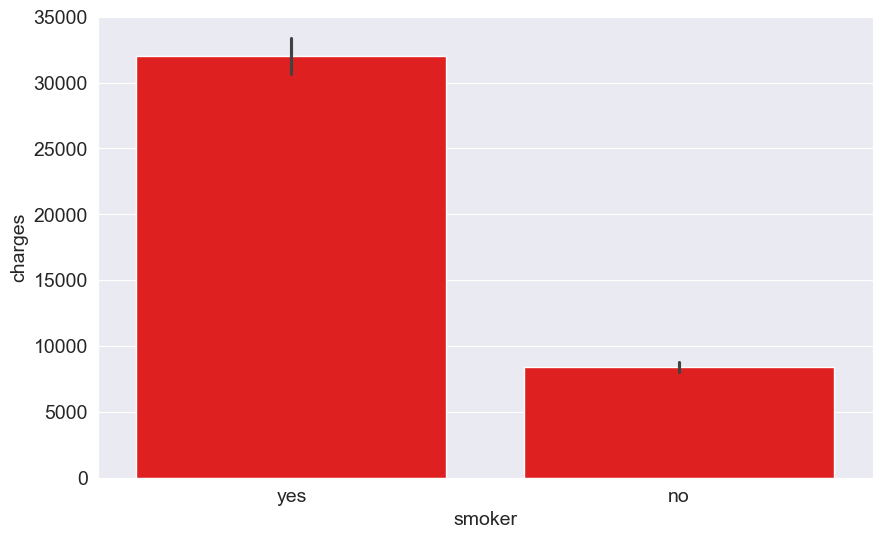

In [1336]:
sns.barplot(data=df,x="smoker",y="charges",color="red")

Help on Axes in module matplotlib.axes._axes object:

class Axes(matplotlib.axes._base._AxesBase)
 |  Axes(fig, *args, facecolor=None, frameon=True, sharex=None, sharey=None, label='', xscale=None, yscale=None, box_aspect=None, **kwargs)
 |
 |  An Axes object encapsulates all the elements of an individual (sub-)plot in
 |  a figure.
 |
 |  It contains most of the (sub-)plot elements: `~.axis.Axis`,
 |  `~.axis.Tick`, `~.lines.Line2D`, `~.text.Text`, `~.patches.Polygon`, etc.,
 |  and sets the coordinate system.
 |
 |  Like all visible elements in a figure, Axes is an `.Artist` subclass.
 |
 |  The `Axes` instance supports callbacks through a callbacks attribute which
 |  is a `~.cbook.CallbackRegistry` instance.  The events you can connect to
 |  are 'xlim_changed' and 'ylim_changed' and the callback will be called with
 |  func(*ax*) where *ax* is the `Axes` instance.
 |
 |  .. note::
 |
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |      methods ins

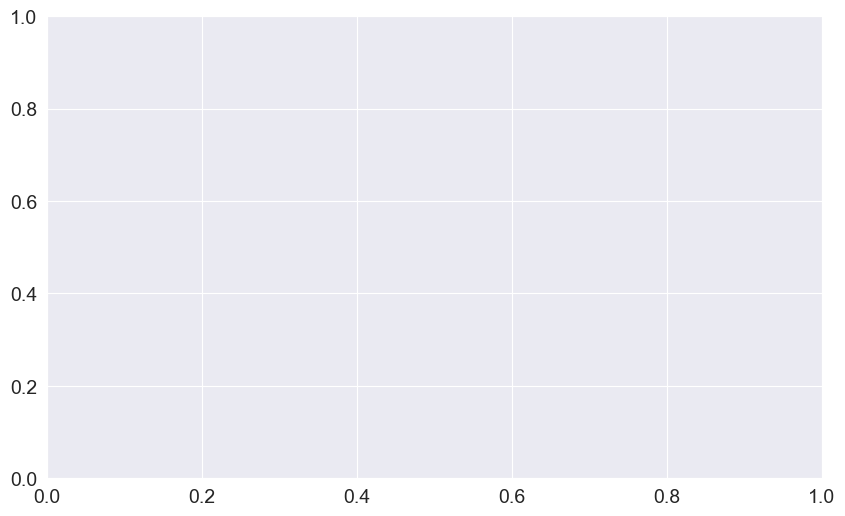

In [1337]:
help(sns.barplot())

In [1338]:
smoker_codes={'yes':1,'no':0}
df['smoker_numeric']=df['smoker'].map(smoker_codes)

In [1339]:
df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_numeric  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1333               0  
1334               0  
1335               0  
1336               0  
1337               1  

[1338 rows x 8 columns]

In [1340]:
input=df[['age','bmi',"children","smoker_numeric"]]
target=df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)
 
loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

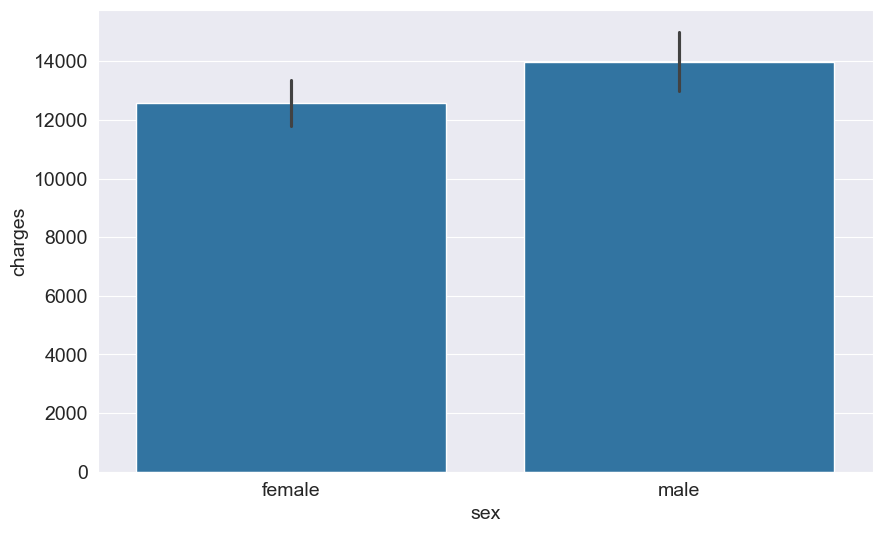

In [1341]:
sns.barplot(data=df, x='sex', y='charges')


In [1342]:
sex_codes = {'female': 0, 'male': 1}
df['sex_code']=df.sex.map(sex_codes)

In [1343]:
input=df[['age','bmi',"children","smoker_numeric","sex_code"]]
target=df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)
 
loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 6056.100708754546


In [1344]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [1345]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [1346]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [1347]:
input=df[['age','bmi',"children","smoker_numeric","sex_code",'northeast', 'northwest', 'southeast', 'southwest']]
target=df['charges']
model=LinearRegression().fit(input,target)
predictions=model.predict(input)
 
loss=rmse(target,predictions)
print("Loss :",loss)

Loss : 6041.6796511744515


In [1348]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [1349]:
model.intercept_

-12525.547811195462

In [1350]:
model.predict([[18,40,1,1,1,1,0,0,0]])

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([30445.33464161])

## Observation
### our model predicted the value as 30445 we need to find why ??????????
#### 23848.53454191 it is the weight for smoker 

In [1356]:
input=['age','bmi',"children","smoker_numeric","sex_code",'northeast', 'northwest', 'southeast', 'southwest']

weight_df=pd.DataFrame({
    'feature':np.append(input,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weight_df

feature        weight
0             age    256.856353
1             bmi    339.193454
2        children    475.500545
3  smoker_numeric  23848.534542
4        sex_code   -131.314359
5       northeast    587.009235
6       northwest    234.045336
7       southeast   -448.012814
8       southwest   -373.041756
9               1 -12525.547811

## Then we are going to standardize the datas

In [1359]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_col=['bmi','age','children']
scaler.fit(df[numeric_col])

StandardScaler()

In [1361]:
scaler.mean_

array([30.66339686, 39.20702541,  1.09491779])

In [1365]:
scaler.var_

array([ 37.16008997, 197.25385199,   1.45212664])

In [1375]:
scaled_inputs=scaler.transform(df[numeric_col])
scaled_inputs

array([[-0.45332   , -1.43876426, -0.90861367],
       [ 0.5096211 , -1.50996545, -0.07876719],
       [ 0.38330685, -0.79795355,  1.58092576],
       ...,
       [ 1.0148781 , -1.50996545, -0.90861367],
       [-0.79781341, -1.29636188, -0.90861367],
       [-0.26138796,  1.55168573, -0.90861367]])

In [1377]:
cat_col=['smoker_numeric','sex_code','northeast','northwest','southeast','southwest']
categorical_data=df[cat_col].values

In [1379]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=df.charges
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss :',loss)

Loss : 6041.6796511744515


In [1381]:

weight_df=pd.DataFrame({
    'feature':np.append(numeric_col+cat_col,1),
    'weight':np.append(model.coef_,model.intercept_)
})
weight_df

feature        weight
0             bmi   2067.691966
1             age   3607.472736
2        children    572.998210
3  smoker_numeric  23848.534542
4        sex_code   -131.314359
5       northeast    587.009235
6       northwest    234.045336
7       southeast   -448.012814
8       southwest   -373.041756
9               1   8466.483215

In [1387]:
new_customer=[[28,30,2,1,0,0,0,1,0]]
model.predict(new_customer)

array([199132.5584923])

## Observation 
### so for the new customer scale the inputs before giving


In [1392]:
new_customer=[[28,30,2,1,0,0,0,1,0]]
scaler.transform([[28,30,2]])


D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.43691555, -0.65555117,  0.75107928]])

In [1394]:
new_customer=[[-0.43691555, -0.65555117,  0.75107928,1,0,0,0,1,0]]
model.predict(new_customer)

array([29029.08228049])

## Observation 
### So we can see that after scaling the inputs numeric col the prediction changes from the 199132 to 29029 

* Explore the data and find correlations between inputs and targets*  
Pick the right model, loss functions and optimizer for the proble at hand*  
Scale numeric variables and one-hot encode categorical dat*  a
Set aside a test set (using a fraction of the training se*  t)
Train the mo*  del
Make predictions on the test set and compute the loss